In [1]:
# Carga bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from sklearn import datasets

%matplotlib inline

In [72]:
def dist_eucl_pw(X,C,p):
    D  = X[:,:,np.newaxis] - np.transpose( C[np.newaxis],(0,2,1) )
    D  = np.transpose(D,(0,2,1))
    D  = np.power(D,p).sum(axis=-1)
    return D.copy()


def dist_minkowski(X,C,p):
    D  = X[:,:,np.newaxis] - np.transpose( C[np.newaxis],(0,2,1) )
    D  = np.abs(  np.transpose(D,(0,2,1))  )
    D  = np.power(D,p).sum(axis=-1)
    return D.copy()

def dist_mahalanobis(X,C):
    D  = X[:,:,np.newaxis] - np.transpose( C[np.newaxis],(0,2,1) )
    D  = np.transpose(D,(0,2,1))
    
    sort = []
    for i,d in enumerate(D):
        C  = np.linalg.inv( np.cov(d.T) )
        dp = np.dot(d ,C.T)
        dp = np.dot(d ,dp.T )
        dp = np.diag(dp)
        
        sort.append( dp )
    
    return np.array(sort).copy()
        

In [3]:
N = 400

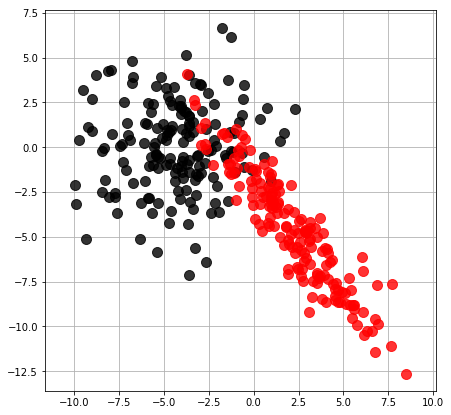

In [53]:
# Blobs de distinta varianza
Xblobs, Lblobs   = datasets.make_blobs(n_samples=N, cluster_std=[1.0, 2.5, 0.5],
                                       random_state=170)

Xblobsv, Lblobsv = datasets.make_blobs(n_samples=N, random_state=170)
Xblobsv          = np.dot(Xblobsv, [[1.6, -2.8], [-2.2, 1.8]])


X0   = Xblobs [Lblobs ==1]
X1   = Xblobsv[Lblobsv==2]

plt.figure(figsize=(7,7))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(X0[:,0],X0[:,1],'ok',markersize=10,alpha=.8)
plt.plot(X1[:,0],X1[:,1],'or',markersize=10,alpha=.8)
plt.grid(True)

In [36]:
from sklearn.cluster import AgglomerativeClustering as agg

In [54]:
X = np.concatenate( (X0,X1),axis=0 )

In [163]:
D = dist_mahalanobis(X,X)

In [149]:
D = dist_minkowski(X,X,5*np.pi)
D.shape

(333, 333)

In [135]:
D = dist_eucl_pw(X,X,7)

In [164]:
model = agg(affinity='precomputed', compute_full_tree='auto',
            connectivity=None, linkage='average', n_clusters=2 )
model.fit(D)


AgglomerativeClustering(affinity='precomputed', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=2, pooling_func=<function mean at 0x7f76c8392de8>)

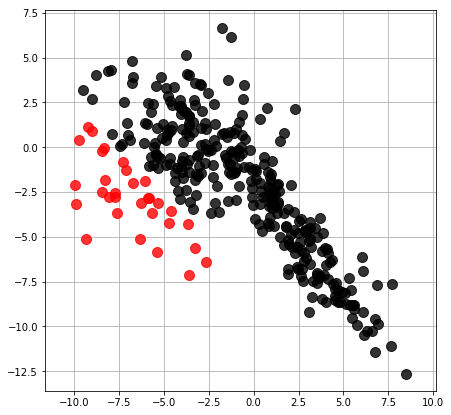

In [165]:
mask = model.labels_

plt.figure(figsize=(7,7))
plt.axes().set_aspect('equal', 'datalim')
plt.plot(X[mask==0,0],X[mask==0,1],'ok',markersize=10,alpha=.8)
plt.plot(X[mask==1,0],X[mask==1,1],'or',markersize=10,alpha=.8)
plt.plot(X[mask==2,0],X[mask==2,1],'ob',markersize=10,alpha=.8)
plt.grid(True)


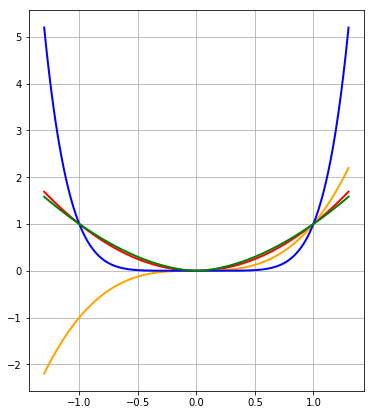

In [140]:
t = np.linspace(-1.3,1.3,1000)

plt.figure(figsize=(6,7))
plt.plot( t,np.power(t,     2)         ,color='red'   ,linewidth=2 )
plt.plot( t,np.power(t,     3)         ,color='orange',linewidth=2 )
plt.plot( t,np.power(np.abs(t),2*np.pi),color='blue'  ,linewidth=2 )
plt.plot( t,np.power(np.abs(t),1.75 ),color='green'  ,linewidth=2 )
plt.grid(True)
plt.show()

In [156]:
from scipy.cluster.hierarchy import dendrogram, linkage

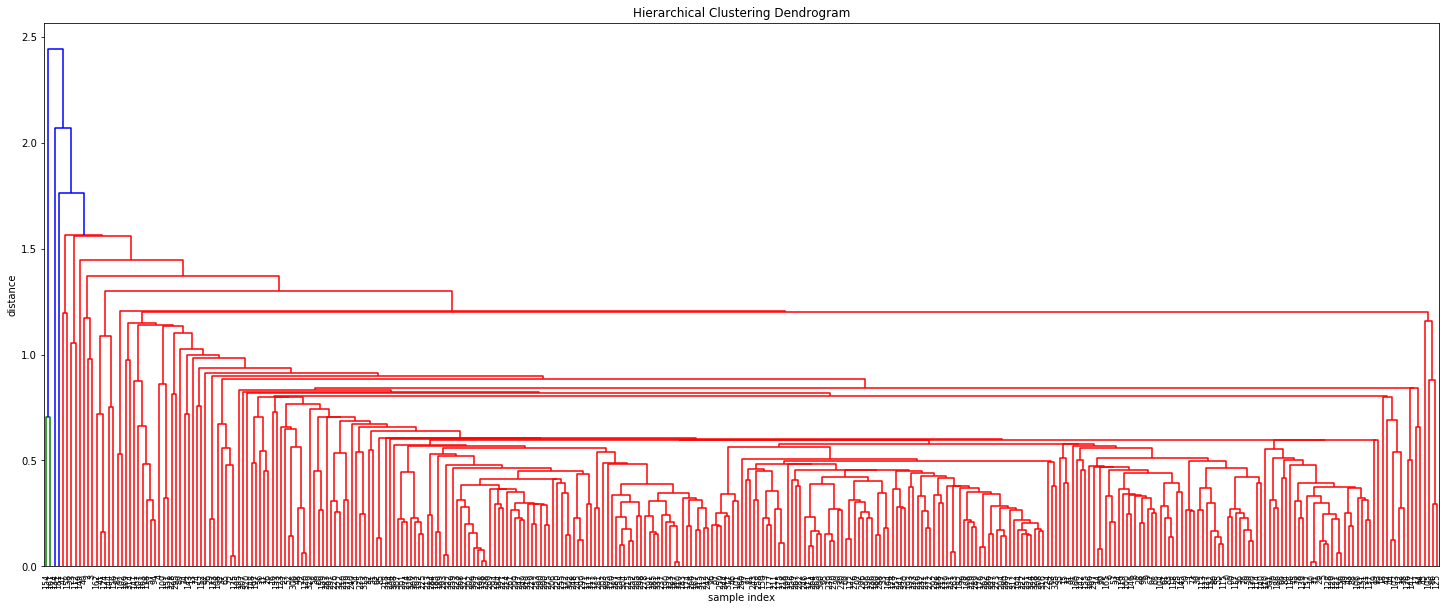

In [167]:
Z = linkage(X)
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()